# ------------------------------
# Instalação de Dependências
# ------------------------------

In [1]:
!git clone https://github.com/eduardobatista/ActVibModules.git

%pip install matplotlib
%pip install pandas feather-format
%pip install numpy
%pip install scipy
%pip install tensorflow
%pip install keras
%pip install pyarrow

fatal: destination path 'ActVibModules' already exists and is not an empty directory.


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


# -------------
# Importações
# -------------

In [2]:
import os
import gdown
import numpy as np
import matplotlib.pyplot as plt

from scipy import signal
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from ActVibModules.ActVibSystem import ActVibData 

# ----------------------
# Verificando diretório
# ----------------------

In [9]:
# Verifique o diretório atual
print("Diretório atual:", os.getcwd())

# Liste os arquivos no diretório atual
print("Arquivos no diretório:", os.listdir())

Diretório atual: C:\Users\jpsfb\OneDrive\Área de Trabalho\LINSE\Dados
Arquivos no diretório: ['ChaveGrande.feather', 'ChaveMedia.feather', 'ChavePequena.feather', 'Dados_Gabriel.7z', 'Dados_Impacto_Amortecido.csv', 'Dados_Impacto_Amortecido.feather', 'Dados_Impacto_Metalico.csv', 'Dados_Impacto_Metalico.feather', 'Dados_Joao.zip', 'DEDOnovaVersao-versao2(VIGA 2).feather', 'Impacto_Chave_Grande-22.feather', 'Impacto_Chave_Media-13.feather', 'Impacto_Chave_Pequena-9.feather', 'MedicaoDEDOjoao.feather', 'MedicaoMETAL2joao.feather', 'MedicaoMetalJOAO.feather', 'MedicoesDedo2joao.feather', 'METALnovaVersao-versAO2 (VIGA 2).feather', 'teste(metal)Joao.feather', 'teste1Joao.feather']


# ------------------------------------------------------
# Download de Arquivos e Configuração do Diretório
# ------------------------------------------------------

In [7]:
# Lista de tuplas contendo o ID do arquivo e o URL de cada arquivo
arquivos_para_baixar = [
    ('MedicaoDEDOjoao', 'https://drive.google.com/file/d/1waQTn6e9-QB5OPWqSTHl4HRZRisL7-rv/view?usp=drive_link'),
    ('MedicaoMETAL2joao', 'https://drive.google.com/file/d/19XDZhFSeum3GM6W2bq2fSOLUs0C-DO5d/view?usp=drive_link'),
    ('MedicaoMetalJOAO', 'https://drive.google.com/file/d/1B-3I_9Dd6cGZ2ccoiEbdP8B-pa4gZZKy/view?usp=drive_link'),
    ('MedicoesDedo2joao', 'https://drive.google.com/file/d/1HV1VR9SBKw7eI1yAJ33VNADVXSZVe_mV/view?usp=drive_link')
]

# Iterar sobre cada tupla e baixar o arquivo correspondente
for arquivo_id, arquivo_url in arquivos_para_baixar:
    gdown.download(arquivo_url, quiet=False, fuzzy=True)

# Mudar o diretório de trabalho
os.chdir(r'C:\Users\jpsfb\OneDrive\Área de Trabalho\LINSE\Dados')

# Verificar o diretório atual e listar os arquivos
print("Diretório atual:", os.getcwd())
print("Arquivos no diretório:", os.listdir())

# Ler os dados dos arquivos
dadosDedo = ActVibData("MedicaoDEDOjoao.feather")
dadosMetal = ActVibData("MedicaoMetalJOAO.feather")
dadosDedo2 = ActVibData("MedicoesDedo2joao.feather")
dadosMetal2 = ActVibData("MedicaoMETAL2joao.feather")

Downloading...
From: https://drive.google.com/uc?id=1waQTn6e9-QB5OPWqSTHl4HRZRisL7-rv
To: C:\Users\jpsfb\OneDrive\Área de Trabalho\LINSE\Dados\MedicaoDEDOjoao.feather
100%|██████████| 6.31M/6.31M [00:00<00:00, 13.6MB/s]
Downloading...
From: https://drive.google.com/uc?id=19XDZhFSeum3GM6W2bq2fSOLUs0C-DO5d
To: C:\Users\jpsfb\OneDrive\Área de Trabalho\LINSE\Dados\MedicaoMETAL2joao.feather
100%|██████████| 6.20M/6.20M [00:00<00:00, 12.3MB/s]
Downloading...
From: https://drive.google.com/uc?id=1B-3I_9Dd6cGZ2ccoiEbdP8B-pa4gZZKy
To: C:\Users\jpsfb\OneDrive\Área de Trabalho\LINSE\Dados\MedicaoMetalJOAO.feather
100%|██████████| 6.49M/6.49M [00:00<00:00, 11.3MB/s]
Downloading...
From: https://drive.google.com/uc?id=1HV1VR9SBKw7eI1yAJ33VNADVXSZVe_mV
To: C:\Users\jpsfb\OneDrive\Área de Trabalho\LINSE\Dados\MedicoesDedo2joao.feather
100%|██████████| 6.26M/6.26M [00:00<00:00, 13.0MB/s]

Diretório atual: C:\Users\jpsfb\OneDrive\Área de Trabalho\LINSE\Dados
Arquivos no diretório: ['ChaveGrande.feather', 'ChaveMedia.feather', 'ChavePequena.feather', 'Dados_Gabriel.7z', 'Dados_Impacto_Amortecido.csv', 'Dados_Impacto_Amortecido.feather', 'Dados_Impacto_Metalico.csv', 'Dados_Impacto_Metalico.feather', 'Dados_Joao.zip', 'DEDOnovaVersao-versao2(VIGA 2).feather', 'Impacto_Chave_Grande-22.feather', 'Impacto_Chave_Media-13.feather', 'Impacto_Chave_Pequena-9.feather', 'MedicaoDEDOjoao.feather', 'MedicaoMETAL2joao.feather', 'MedicaoMetalJOAO.feather', 'MedicoesDedo2joao.feather', 'METALnovaVersao-versAO2 (VIGA 2).feather', 'teste(metal)Joao.feather', 'teste1Joao.feather']


# ---------------------------------
# Análise e Visualização de Dados
# ---------------------------------

,time,dac1,dac2,dac3,dac4,imu1accx,imu1accy,imu1accz,imu1gyrox,imu1gyroy,imu1gyroz,imu2accx,imu2accy,imu2accz,imu2gyrox,imu2gyroy,imu2gyroz,log
0,0.000000,0.0,0.0,0.0,0.0,0.852336,19.529503,-1.258153,0.278473,-3.627777,-4.497528,-1.659182,19.673155,3.558981,3.070831,-6.408691,-2.479553,Started
1,0.004808,0.0,0.0,0.0,0.0,0.851139,19.525912,-0.474052,0.602722,-3.688812,-4.524231,-1.656788,19.638439,3.229778,0.736237,-6.916046,-2.475739,"IMU1|LSM6DS3|0x6B|I2C-1|±4g (±39,2m/s²)|±125º/..."
2,0.009616,0.0,0.0,0.0,0.0,0.841562,19.563022,1.546654,0.934601,-3.730774,-4.371643,-1.662773,19.343952,0.769736,-1.682281,-7.236481,-2.422333,"IMU2|LSM6DS3|0x6B|I2C-2|±4g (±39,2m/s²)|±125º/..."
3,0.014424,0.0,0.0,0.0,0.0,0.884658,19.607314,2.740164,0.717163,-3.910065,-4.463196,-1.696292,19.135657,-1.393425,-1.632690,-7.198334,-2.445221,IMU3|Disabled
4,0.019232,0.0,0.0,0.0,0.0,0.852336,19.566613,1.845929,0.427246,-3.662109,-4.493713,-1.702277,19.117700,-1.407791,0.556946,-6.835938,-2.460480,ADC|ADS1015|0|0|0|0|±0.256 V|1600 SPS


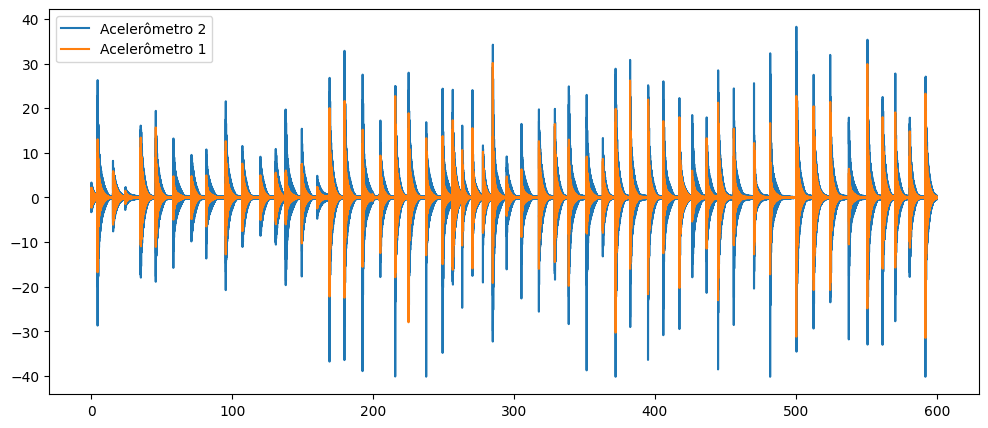

(array([   940,   3219,   7295,   9520,  12134,  14801,  16992,  19850,
        22302,  24968,  27222,  28726,  31092,  35170,  37391,  40060,
        42680,  44867,  46845,  49450,  51876,  53350,  54754,  56268,
        57816,  59264,  61335,  63503,  66078,  68423,  70497,  73129,
        75513,  77407,  79529,  82200,  84441,  86818,  88702,  90829,
        92531,  94840,  97846, 100207, 104069, 106620, 109081, 111831,
       114556, 116808, 118676, 120809, 123127], dtype=int64), {'peak_heights': array([13.04524462,  5.84947153, 13.42472558, 15.69203455,  4.75532137,
        4.73736486,  4.9480546 , 12.61309122,  7.60083004,  4.97558792,
        5.55737893,  6.05656997,  7.51344168, 20.03032796, 21.62606337,
       15.19404061,  9.39648129, 22.72979033, 18.88350537, 13.29065029,
       13.7455486 , 17.31889458, 10.63548065, 15.54598825, 10.23325477,
       30.15061838,  4.71940835,  6.31873506, 12.62386513, 16.46895299,
       12.97222147,  9.17501764,  8.65427877, 19.87470485, 26.

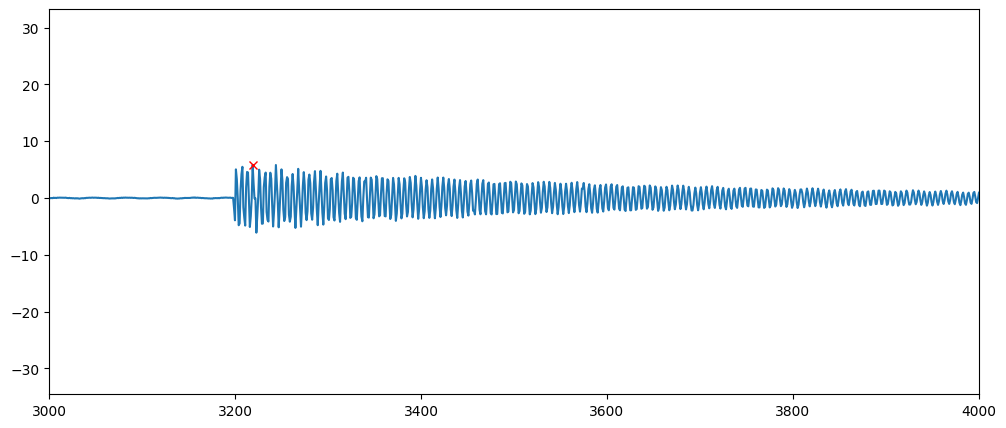

In [8]:
# Exibir os primeiros registros dos dados
display(dadosDedo.head())

# Visualizar as séries temporais dos dados
acc1d = dadosDedo.imu1accz.values - dadosDedo.imu1accz.mean()  
acc2d = dadosDedo.imu2accz.values - dadosDedo.imu2accz.mean()  
time = dadosDedo.time.values

plt.plot(time, acc2d, label="Acelerômetro 2")
plt.plot(time, acc1d, label="Acelerômetro 1")
plt.legend()
plt.gcf().set_size_inches(12, 5)
plt.show()

# Encontrar picos nas séries temporais
aux1 = signal.find_peaks(acc1d, height=3, distance=1300)
print(aux1)
plt.plot(acc1d)
plt.plot(aux1[0], aux1[1]['peak_heights'], 'xr')
plt.xlim(3000, 4000)
plt.gcf().set_size_inches(12, 5)
plt.show()

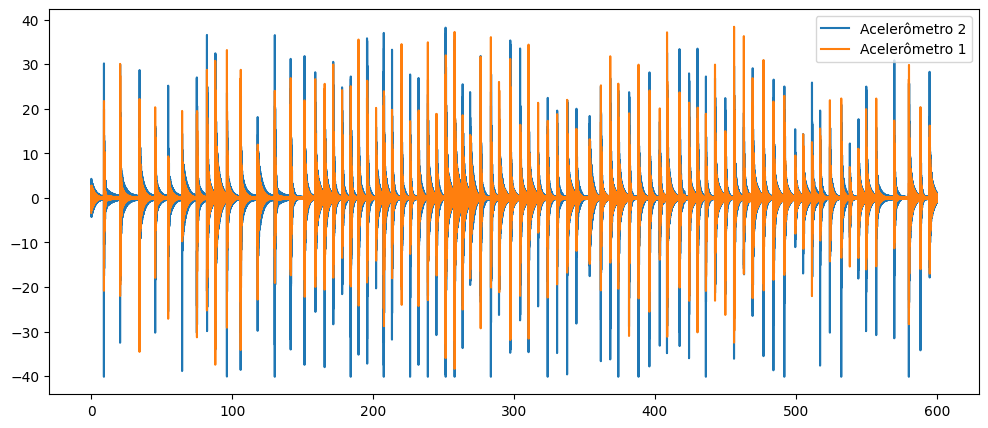

(array([  1882,   4262,   7134,   9437,  11361,  13411,  15607,  17074,
        18296,  20026,  22072,  24574,  27092,  29436,  31475,  33060,
        34457,  35713,  37021,  38297,  39446,  40737,  42040,  43202,
        44394,  45801,  47063,  48327,  49685,  50950,  52331,  53629,
        54818,  55936,  57467,  58987,  60186,  61840,  63328,  64547,
        65959,  67377,  68762,  70244,  71610,  73572,  75229,  76605,
        77794,  79388,  80782,  82410,  83916,  84987,  86833,  88249,
        89510,  90721,  92068,  93593,  94883,  96324,  97621,  99227,
       100695, 102297, 103930, 105079, 106381, 107576, 109027, 110702,
       111968, 113221, 114370, 115868, 118529, 120701, 122394, 123761],
      dtype=int64), {'peak_heights': array([21.75172266, 30.07396763, 22.19704417, 20.33674948,  9.32222474,
       19.51434121, 19.5035673 , 28.7380031 , 30.77427161, 33.18283848,
       28.74757991, 11.95345236, 24.02860844, 26.89805913, 21.88460085,
       26.65385056, 25.60040183, 29

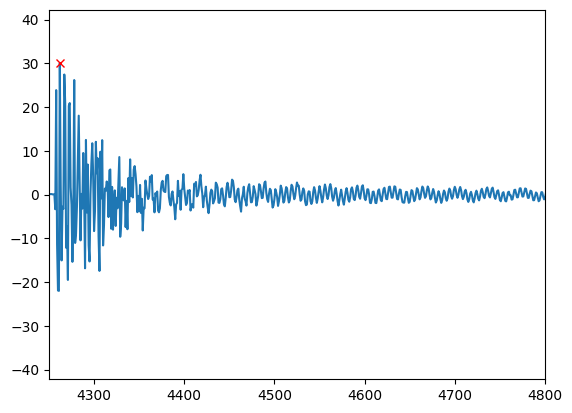

In [10]:
# Visualizar os dados de outro arquivo e encontrar picos
acc1m = dadosMetal.imu1accz.values - dadosMetal.imu1accz.mean()  
acc2m = dadosMetal.imu2accz.values - dadosMetal.imu2accz.mean() 
time = dadosMetal.time.values

plt.plot(time, acc2m, label="Acelerômetro 2")
plt.plot(time, acc1m, label="Acelerômetro 1")
plt.legend()
plt.gcf().set_size_inches(12, 5)
plt.show()

aux2 = signal.find_peaks(acc1m, height=3, distance=1000) 
print(aux2)
plt.plot(acc1m)
plt.plot(aux2[0], aux2[1]['peak_heights'], 'xr')
plt.xlim(4250, 4800)
plt.show()


# ------------------------------------------
# Preparação dos dados para a modelagem
# ------------------------------------------

In [14]:
TamJanela = int(3.6 * 208)

# Função para criar amostras e rótulos a partir dos dados
def criar_amostras_e_rotulos(dados, nome_arquivo):
    acc1 = dados.imu1accz.values - dados.imu1accz.mean()
    picos, _ = signal.find_peaks(acc1, height=3, distance=1500)
    amostras = []
    rotulos = []

    for i in range(len(picos) - 1):
        inicio = picos[i]
        fim = picos[i] + TamJanela
        amostra = acc1[inicio:fim]
        amostra = amostra - amostra.mean() 
        amostra = amostra / amostra.max()
        amostras.append(amostra)
        rotulos.append(nome_arquivo)

    return amostras, rotulos

# Criar amostras e rótulos para todos os conjuntos de dados
amostras_dedo, rotulos_dedo = criar_amostras_e_rotulos(dadosDedo, "MedicaoDEDOjoao.feather")
amostras_metal, rotulos_metal = criar_amostras_e_rotulos(dadosMetal, "MedicaoMetalJOAO.feather")
amostras_dedo2, rotulos_dedo2 = criar_amostras_e_rotulos(dadosDedo2, "MedicoesDedo2joao.feather")
amostras_metal2, rotulos_metal2 = criar_amostras_e_rotulos(dadosMetal2, "MedicaoMETAL2joao.feather")

# -----------------------
# Empilhando as amostras
# -----------------------

In [15]:
# Empilhar amostras equalizadas
X = np.vstack(amostras_dedo + amostras_metal + amostras_metal2 + amostras_dedo2)
y = np.array(rotulos_dedo + rotulos_metal + rotulos_metal2 + rotulos_dedo2)

# Codificar rótulos
yenc = np.zeros(len(y), dtype=int)
for k, yy in enumerate(y):
    if "2" in yy.lower():
        yenc[k] = 0
    else:
        yenc[k] = 1

print(X.shape, y.shape)

# TRECHO PARA TESTE: "2" = diferenciação entre vigas e "dedo" = diferenciação entre DEDO e METAL -> basta substituir para testar

(195, 748) (195,)


# ---------------------------------
# Análise e visualização dos dados
# ---------------------------------

Amostras de dedo1: 49
Amostras de metal1: 51
Amostras de dedo2: 47
Amostras de metal2: 48
Tamanho de X: (195, 748)
Tamanho de y: (195,)


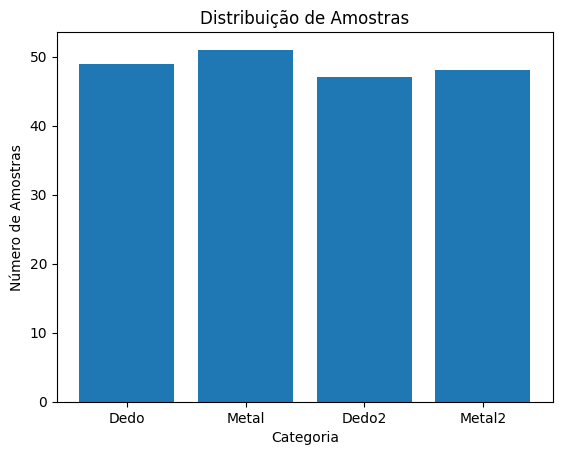

In [16]:
# Exibir informações sobre a distribuição dos dados
print("Amostras de dedo1:", len(amostras_dedo))
print("Amostras de metal1:", len(amostras_metal))
print("Amostras de dedo2:", len(amostras_dedo2))
print("Amostras de metal2:", len(amostras_metal2))
print("Tamanho de X:", X.shape)
print("Tamanho de y:", y.shape)

# Criar um gráfico de barras para mostrar a distribuição de amostras
categorias = ['Dedo', 'Metal', 'Dedo2', 'Metal2']
num_amostras = [len(amostras_dedo), len(amostras_metal), len(amostras_dedo2), len(amostras_metal2)]

plt.bar(categorias, num_amostras)
plt.xlabel('Categoria')
plt.ylabel('Número de Amostras')
plt.title('Distribuição de Amostras')
plt.show()


# ---------------------------------
# Treinamento do Modelo e Avaliação
# ---------------------------------

In [21]:
# Definir o número de repetições para treinamento e teste
n = 50
resultados = []

# Repetir o treinamento e teste do modelo
for k in range(n):
    # Dividir o conjunto de dados em treino e teste
    indices = np.random.permutation(len(X))
    split_point = int(0.8 * len(X))
    X_train, X_test = X[indices[:split_point]], X[indices[split_point:]]
    y_train, y_test = yenc[indices[:split_point]], yenc[indices[split_point:]]

    # Criar e treinar o modelo
    model = Sequential()
    model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer=Adam(), metrics=['accuracy'])
    model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=0)

    # Avaliar o modelo
    _, accuracy = model.evaluate(X_test, y_test, verbose=0)
    resultados.append(accuracy)

# Exibir métricas de desempenho do modelo
print()
print("Média:", np.mean(resultados))
print("Variância:", np.var(resultados))
print("Desvio padrão:", np.std(resultados))



Média: 0.9487179517745972
Variância: 0.0009993424186731659
Desvio padrão: 0.03161237761816035


In [20]:
# Treinar o modelo
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Obter as acurácias do treinamento e validação de cada época
train_accuracies = history.history['accuracy']
val_accuracies = history.history['val_accuracy']

# Calcular a média das acurácias do treinamento e validação
avg_train_accuracy = np.mean(train_accuracies)
avg_val_accuracy = np.mean(val_accuracies)

# Avaliar o modelo no conjunto de teste
_, accuracy = model.evaluate(X_test, y_test)

# Fazer previsões no conjunto de teste
y_pred_probs = model.predict(X_test)
y_pred = (y_pred_probs > 0.5).astype(int)

# Imprimir a média das acurácias
print()
print(f'Média da Acurácia do Treinamento: {avg_train_accuracy:.2f}')
print(f'Média da Acurácia da Validação: {avg_val_accuracy:.2f}')
print(f'Acurácia do modelo no conjunto de teste: {accuracy:.2f}')

Epoch 1/10
5/5 [==============================] - 0s 19ms/step - loss: 0.0179 - accuracy: 1.0000 - val_loss: 0.1430 - val_accuracy: 0.9487
Epoch 2/10
5/5 [==============================] - 0s 9ms/step - loss: 0.0169 - accuracy: 1.0000 - val_loss: 0.1393 - val_accuracy: 0.9487
Epoch 3/10
5/5 [==============================] - 0s 9ms/step - loss: 0.0158 - accuracy: 1.0000 - val_loss: 0.1367 - val_accuracy: 0.9487
Epoch 4/10
5/5 [==============================] - 0s 8ms/step - loss: 0.0149 - accuracy: 1.0000 - val_loss: 0.1331 - val_accuracy: 0.9487
Epoch 5/10
1/5 [=====>........................] - ETA: 0s - loss: 0.0116 - accuracy: 1.0000

5/5 [==============================] - 0s 9ms/step - loss: 0.0141 - accuracy: 1.0000 - val_loss: 0.1299 - val_accuracy: 0.9487
Epoch 6/10
5/5 [==============================] - 0s 10ms/step - loss: 0.0133 - accuracy: 1.0000 - val_loss: 0.1273 - val_accuracy: 0.9487
Epoch 7/10
5/5 [==============================] - 0s 8ms/step - loss: 0.0126 - accuracy: 1.0000 - val_loss: 0.1250 - val_accuracy: 0.9487
Epoch 8/10
5/5 [==============================] - 0s 8ms/step - loss: 0.0120 - accuracy: 1.0000 - val_loss: 0.1223 - val_accuracy: 0.9487
Epoch 9/10
5/5 [==============================] - 0s 8ms/step - loss: 0.0113 - accuracy: 1.0000 - val_loss: 0.1194 - val_accuracy: 0.9487
Epoch 10/10
2/2 [==============================] - 0s 3ms/step

Média da Acurácia do Treinamento: 1.00
Média da Acurácia da Validação: 0.95
Acurácia do modelo no conjunto de teste: 0.97
